In [79]:
import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=False)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,6)

In [18]:
#Read in 5K sample
asthma_df=pd.read_csv("ukbb_asthma_sample.csv",sep='\t')

In [19]:
asthma_df.columns

Index([u'Unnamed: 0', u'FID', u'IID', u'RGC_ID', u'random_normal',
       u'random_binary', u'sex', u'chip', u'PC1', u'PC2',
       ...
       u'f_40019_0_p_D40_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_male_genital_organs',
       u'f_40019_0_p_D41_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_urinary_organs',
       u'f_40019_0_p_D42_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_meninges',
       u'f_40019_0_p_D43_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_brain_and_CNS',
       u'f_40019_0_p_D44_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_endocrine_glands',
       u'f_40019_0_p_D45_CAT_Polycythaemia_vera',
       u'f_40019_0_p_D46_CAT_Myelodysplastic_syndromes',
       u'f_40019_0_p_D47_CAT_Other_neoplasms_of_uncertain_behaviour_of_lymphoid_haematopoietic',
       u'f_40019_0_p_D48_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_other_sites',
       u'f_40019_0_p_O01_CAT_Hydatidiform_mole'],
      dtype='object', length=7618)

In [20]:
# Select columns to filter on
cols = [col for col in asthma_df.columns if 'HES_p' not in col and 'PC' not in col]

In [21]:
asthma_df=asthma_df[cols].drop('Unnamed: 0',axis=1)

In [22]:
asthma_df.columns

Index([u'FID', u'IID', u'RGC_ID', u'random_normal', u'random_binary', u'sex',
       u'chip', u'age', u'BMI', u'asthma',
       ...
       u'f_40019_0_p_D40_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_male_genital_organs',
       u'f_40019_0_p_D41_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_urinary_organs',
       u'f_40019_0_p_D42_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_meninges',
       u'f_40019_0_p_D43_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_brain_and_CNS',
       u'f_40019_0_p_D44_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_endocrine_glands',
       u'f_40019_0_p_D45_CAT_Polycythaemia_vera',
       u'f_40019_0_p_D46_CAT_Myelodysplastic_syndromes',
       u'f_40019_0_p_D47_CAT_Other_neoplasms_of_uncertain_behaviour_of_lymphoid_haematopoietic',
       u'f_40019_0_p_D48_CAT_Neoplasm_of_uncertain_or_unknown_behaviour_of_other_sites',
       u'f_40019_0_p_O01_CAT_Hydatidiform_mole'],
      dtype='object', length=5172)

In [23]:
asthma_df.std()

FID                                                                                                           15466.704054
IID                                                                                                           15466.704054
random_normal                                                                                                     1.057976
random_binary                                                                                                     0.500106
sex                                                                                                               0.494438
chip                                                                                                              0.284886
age                                                                                                               7.400861
BMI                                                                                                               4.417319
asthma          

In [29]:
asthma_df_mean = asthma_df.mean()

In [30]:
asthma_df.mean()

FID                                                                                                           1.027003e+06
IID                                                                                                           1.027003e+06
random_normal                                                                                                 3.028087e-02
random_binary                                                                                                 4.880000e-01
sex                                                                                                           1.576000e+00
chip                                                                                                          1.089000e+00
age                                                                                                           5.645500e+01
BMI                                                                                                           2.671811e+01
asthma          

In [28]:
asthma_df_mean.max()

1027002.795

In [31]:
asthma_df_mean.min()

-6.924802110817942

In [36]:
asthma_df_mean.sort_values()

f_20019_0_0_f_QUANT_Speech_reception_threshold_SRT_estimate_left                                              -6.924802
f_20021_0_0_f_QUANT_Speech_reception_threshold_SRT_estimate_right                                             -6.915782
specialRequest_QUANT_hear_loss_B                                                                              -6.192257
f_20002_0_dxCode_9_BIN_character_0                                                                            -2.880000
f_189_0_0_f_QUANT_Townsend_deprivation_index_at_recruitment                                                   -1.966645
f_40008_0_p_C19_QUANT_Malignant_neoplasm_of_rectosigmoid_junction_residualizedRelated                         -1.762121
f_40008_0_p_C78_QUANT_Secondary_malignant_neoplasm_of_respiratory_and_digestive_organs_residualizedRelated    -1.690622
f_40008_0_p_D47_QUANT_Other_neoplasms_of_uncertain_behaviour_of_lymphoid_haematopoietic_residualizedRelated   -1.524340
f_5430_0_0_f_QUANT_Age_when_loss_of_visi

In [46]:
cor=pd.DataFrame.corr(asthma_df)

In [64]:
correlated_variables=cor.unstack().sort_values(ascending=False)

In [77]:
#print(correlated_variables.index[0],correlated_variables[0])
print(correlated_variables.head(50))

f_40008_0_p_C73_QUANT_Malignant_neoplasm_of_thyroid_gland                                  f_23121_0_0_f_QUANT_Arm_fat_free_mass_right_residualizedRelated                       1.0
f_40011_0_p_C62_CAT_Malignant_neoplasm_of_testis                                           f_20240_0_0_f_QUANT_Maximum_digits_remembered_correctly_residualizedRelated           1.0
f_20156_0_0_f_QUANT_Duration_to_complete_numeric_path_trail_1                              f_40008_0_p_D01_QUANT_Carcinoma_in_situ_of_other_digestive_organs                     1.0
f_22408_0_0_f_QUANT_Abdominal_subcutaneous_adipose_tissue_volume_ASAT_residualizedRelated  f_23115_0_0_f_QUANT_Leg_fat_percentage_left                                           1.0
f_20156_0_0_f_QUANT_Duration_to_complete_numeric_path_trail_1                              f_40008_0_p_C56_QUANT_Malignant_neoplasm_of_ovary                                     1.0
f_20107_20110_code6_QUANT_Chronic_bronchitis_emphysema_residualizedRelated                 f_40

In [78]:
print(cor.unstack().head(20))

FID  FID                                                                              1.000000
     IID                                                                              1.000000
     random_normal                                                                   -0.006340
     random_binary                                                                   -0.007622
     sex                                                                             -0.033115
     chip                                                                            -0.009014
     age                                                                             -0.001282
     BMI                                                                             -0.037345
     asthma                                                                                NaN
     f_20006_0_0_f_QUANT_Interpolated_Year_when_cancer_first_diagnosed                0.011715
     f_20008_0_0_f_QUANT_Interpolated_Year_when_no

In [76]:
#print(cor.sort_values(by='sex',ascending=False).head())
print(cor.head())

                    FID       IID  random_normal  random_binary       sex  \
FID            1.000000  1.000000      -0.006340      -0.007622 -0.033115   
IID            1.000000  1.000000      -0.006340      -0.007622 -0.033115   
random_normal -0.006340 -0.006340       1.000000       0.025519 -0.007635   
random_binary -0.007622 -0.007622       0.025519       1.000000  0.015837   
sex           -0.033115 -0.033115      -0.007635       0.015837  1.000000   

                   chip       age       BMI  asthma  \
FID           -0.009014 -0.001282 -0.037345     NaN   
IID           -0.009014 -0.001282 -0.037345     NaN   
random_normal  0.000006  0.004075  0.041049     NaN   
random_binary -0.024113  0.018650  0.015671     NaN   
sex           -0.023195 -0.059656 -0.101033     NaN   

               f_20006_0_0_f_QUANT_Interpolated_Year_when_cancer_first_diagnosed  \
FID                                                     0.011715                   
IID                                   

In [314]:
#select only 'QUANTITY' fields
asthma_df_quant=asthma_df.loc[:, asthma_df.columns.str.contains('QUANT')].fillna(0.0)
#select only fields with 10 or more unique values
for col in asthma_df_quant.columns:
    if len(asthma_df_quant[col].unique()) < 50 :
        asthma_df_quant.drop(col,inplace=True,axis=1)
#calculate correlation matrix, take absolute value
corr_matrix=asthma_df_quant.corr().abs()
#only keep upper half of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool))
# filter to highly correlated 0.9-0.975 range
corr_var_df = upper.stack().where(lambda x: np.fabs(x) < 0.99).dropna().sort_values(ascending=False).reset_index()
# rename data frame varialbes
corr_var_df.columns = ['Variable1','Variable2','Correlation']
corr_var_df=corr_var_df.drop_duplicates(keep='first')


In [256]:
corr_var_df.to_csv('uncorrelated pairs.csv')

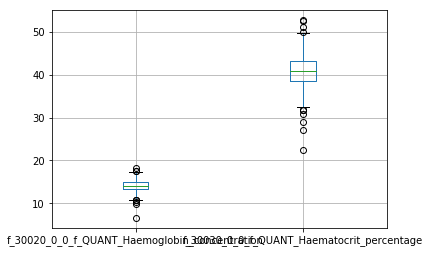

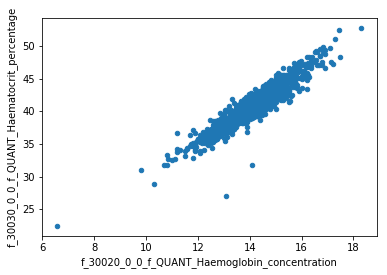

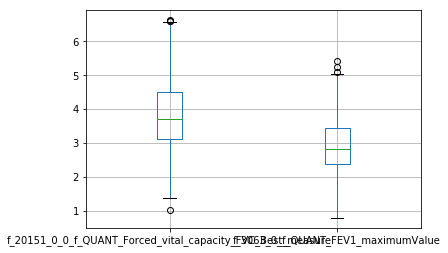

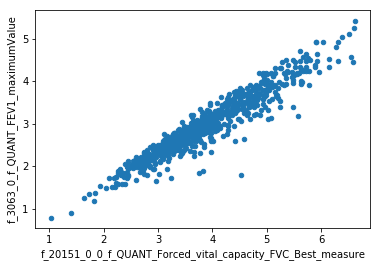

In [84]:
# from 0 to 3rd highest correlated variable
for i in xrange(2,4):
    boxplot=asthma_df.boxplot(column=[corr_var_df['Variable1'][i],corr_var_df['Variable2'][i]])
    scatterplot=asthma_df.plot.scatter(x=corr_var_df['Variable1'][i],y=corr_var_df['Variable2'][i])
    plt.show(boxplot)
    plt.show(scatterplot)


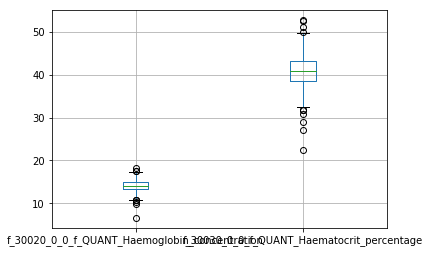

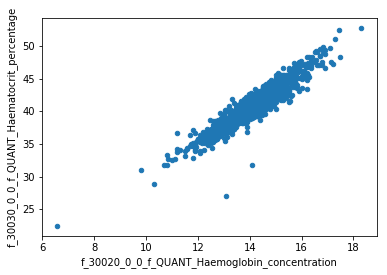

In [103]:
i=2
boxplot=asthma_df.boxplot(column=[corr_var_df['Variable1'][i],corr_var_df['Variable2'][i]])
scatterplot=asthma_df.plot.scatter(x=corr_var_df['Variable1'][i],y=corr_var_df['Variable2'][i])
plt.show(boxplot)
plt.show(scatterplot)

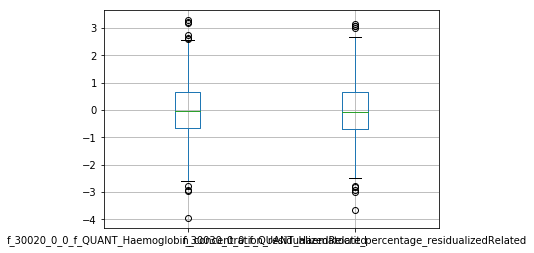

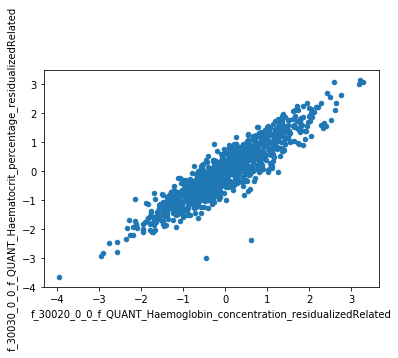

In [340]:
i=215
boxplot=asthma_df.boxplot(column=[corr_var_df['Variable1'][i],corr_var_df['Variable2'][i]])
scatterplot=asthma_df.plot.scatter(x=corr_var_df['Variable1'][i],y=corr_var_df['Variable2'][i])
plt.show(boxplot)
plt.show(scatterplot)

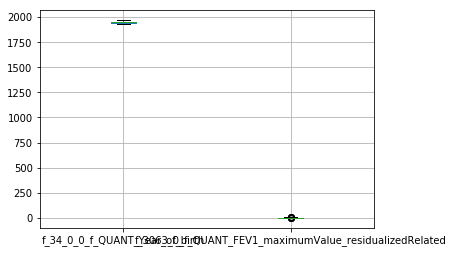

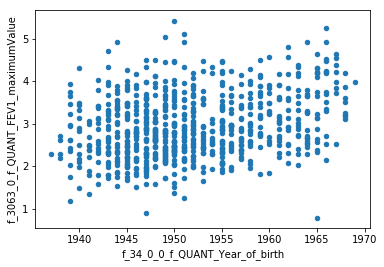

In [312]:
boxplot=asthma_df.boxplot(column=['f_34_0_0_f_QUANT_Year_of_birth',corr_var_df['Variable2'][i]])
scatterplot=asthma_df.plot.scatter(x='f_34_0_0_f_QUANT_Year_of_birth',y='f_3063_0_f_QUANT_FEV1_maximumValue')
plt.show(boxplot)
plt.show(scatterplot)

In [308]:
temp=[x for x in asthma_df.columns if 'Year_of_birth' in x]

In [309]:
temp

['f_34_0_0_f_QUANT_Year_of_birth',
 'f_22200_0_0_f_QUANT_Year_of_birth',
 'f_34_0_0_f_QUANT_Year_of_birth_residualizedRelated',
 'f_22200_0_0_f_QUANT_Year_of_birth_residualizedRelated']

In [10]:
import pandas as pd
df = pd.read_csv('correlated pairs.csv')

In [16]:
df.columns.values
df.Variable2.unique() == df.Variable1.unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,